In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [5]:
data = pd.read_csv("Mobile_class/train.csv")

In [6]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [8]:
best_feature = SelectKBest(score_func=chi2, k=10)

In [9]:
fit = best_feature.fit(X,y)

In [10]:
dfscores = pd.DataFrame(fit.scores_)

In [11]:
dfscores

,0
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [12]:
dfcolumns = pd.DataFrame(X.columns)

In [13]:
dfcolumns

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [15]:
feature_scores = pd.concat([dfcolumns,dfscores],axis=1)

In [16]:
feature_scores.columns=['Features','Scores']

In [17]:
feature_scores

,Features,Scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [48]:
ten_features = feature_scores.sort_values(by='Scores',ascending=False).head(10)['Features'].values

# Feature Importance

In [20]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 

In [21]:
model = RandomForestClassifier()

In [22]:
model.fit(X,y)

RandomForestClassifier()

In [23]:
model.feature_importances_

array([0.07247095, 0.00674222, 0.02872498, 0.00712119, 0.0239514 ,
       0.00599725, 0.03655842, 0.02419745, 0.03877915, 0.02293667,
       0.02954667, 0.05587233, 0.05861569, 0.48313043, 0.02746477,
       0.02892336, 0.02955792, 0.00590705, 0.00743713, 0.00606497])

In [44]:
feature_importance = pd.DataFrame(model.feature_importances_,index=X.columns,columns=['Importance'])

In [45]:
feature_importance

,Importance
battery_power,0.072471
blue,0.006742
clock_speed,0.028725
dual_sim,0.007121
fc,0.023951
four_g,0.005997
int_memory,0.036558
m_dep,0.024197
mobile_wt,0.038779
n_cores,0.022937


In [46]:
feature_importance.sort_values(by=['Importance'],ascending=False)

,Importance
ram,0.483130
battery_power,0.072471
px_width,0.058616
px_height,0.055872
mobile_wt,0.038779
int_memory,0.036558
talk_time,0.029558
pc,0.029547
sc_w,0.028923
clock_speed,0.028725


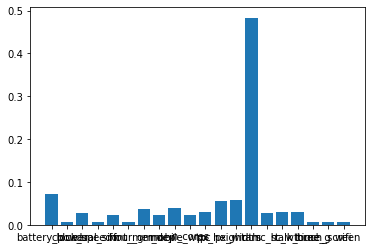

In [33]:
plt.Figure(figsize=(20,10))
plt.bar(feature_importance.index,feature_importance['Importance'])
plt.show()

# Correlation Based Methord

In [35]:
data_corr = data.corr()

In [36]:
import seaborn as sns

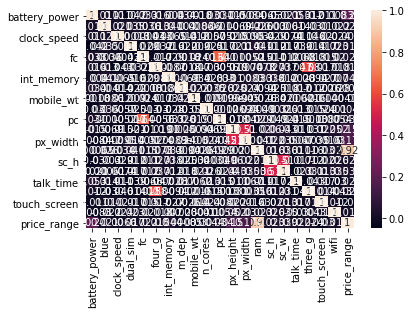

In [37]:
plt.Figure(figsize=(20,20))
sns.heatmap(data_corr,annot=True)
plt.show()

# Check the Model Performance

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [50]:
rfs = RandomForestClassifier(max_depth=10)

In [52]:
score = cross_val_score(rfs,X,y,cv=10)

In [53]:
score.mean()

0.883

In [55]:
scores_new = cross_val_score(rfs,X[ten_features],y,cv=10)

In [56]:
scores_new

array([0.9  , 0.905, 0.905, 0.9  , 0.925, 0.915, 0.89 , 0.885, 0.875,
       0.905])

In [57]:
scores_new.mean()

0.9005000000000001